## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [45]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [46]:
df.drop('customer_id',axis=1,inplace=True)

In [47]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.shape

(10000, 11)

In [8]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## Countor plot

In [9]:
import seaborn as sns


In [12]:
print(df['gender'].unique())
print(df['gender'].dtype)

['Female' 'Male']
object


<AxesSubplot:xlabel='gender', ylabel='count'>

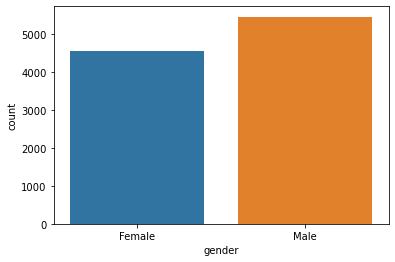

In [14]:
sns.countplot(x='gender', data=df)


In [15]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

<AxesSubplot:xlabel='gender'>

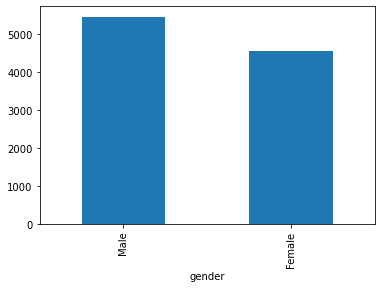

In [16]:
df['gender'].value_counts().plot(kind='bar')

## Pie Chart

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='count'>

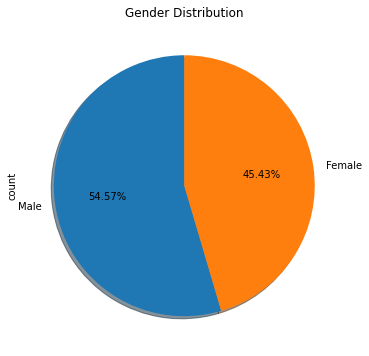

In [18]:
df['gender'].value_counts().plot.pie(autopct='%.2f%%', startangle=90, shadow=True, figsize=(6,6), title='Gender Distribution')


<AxesSubplot:xlabel='churn', ylabel='count'>

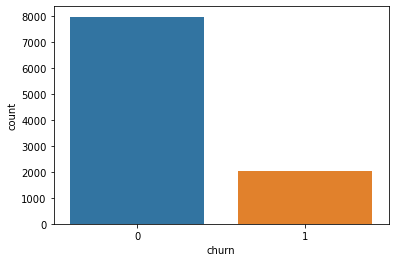

In [21]:
sns.countplot(x='churn', data=df)

<AxesSubplot:title={'center':'churn Distribution'}, ylabel='count'>

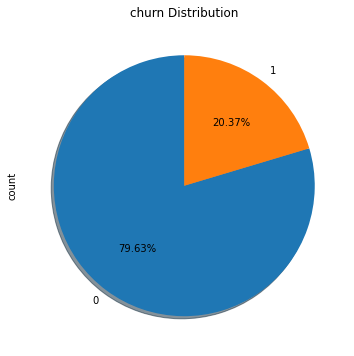

In [22]:
df['churn'].value_counts().plot.pie(autopct='%.2f%%', startangle=90, shadow=True, figsize=(6,6), title='churn Distribution')


In [23]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

## Numerical Columns

### Histogram

In [24]:
import matplotlib.pyplot as plt

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <BarContainer object of 20 artists>)

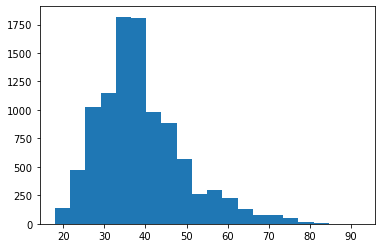

In [26]:
plt.hist(df['age'],bins=20)

In [34]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

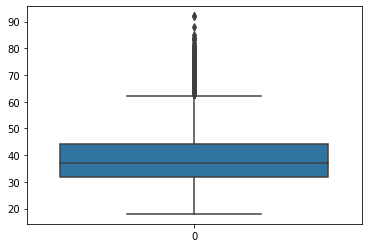

In [35]:
sns.boxplot(df['age'])

## Encoding

In [41]:
# Encoding 
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,NaN,42,2,0.00,1,1,1,101348.88,1
1,608,1,NaN,41,1,83807.86,1,0,1,112542.58,0
2,502,0,NaN,42,8,159660.80,3,1,0,113931.57,1
3,699,0,NaN,39,1,0.00,2,0,0,93826.63,0
4,850,1,NaN,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,NaN,39,5,0.00,2,1,0,96270.64,0
9996,516,0,NaN,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,NaN,36,7,0.00,1,0,1,42085.58,1
9998,772,2,NaN,42,3,75075.31,2,1,0,92888.52,1


In [48]:
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [49]:
df['country']=df['country'].map({'France':0,'Spain':1,'Germany':2})

In [50]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


## Train test Split

In [52]:
x=df.drop('churn',axis=1)
y=df['churn']

In [53]:
x.shape

(10000, 10)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [56]:
x_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,2,1,42,4,119624.60,2,1,1,195978.86
1670,559,1,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


## Standardization

## Model Training 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM (RBF Kernel)': SVC(probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.2f}")


Logistic Regression accuracy: 0.80
Decision Tree accuracy: 0.78
Random Forest accuracy: 0.87
Naive Bayes accuracy: 0.79
SVM (RBF Kernel) accuracy: 0.80
AdaBoost accuracy: 0.86
Gradient Boosting accuracy: 0.86
XGBoost accuracy: 0.86


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [93]:

y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [94]:
accuracy_score(y_test,y_pred)

0.865

## Prediction System

In [95]:
import numpy as np

def prediction(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary):
    features = np.array([[credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary]])
    pred = rfc.predict(features)
    return pred[0]

In [96]:
credit_score = 619
country = 0
gender = 0
age = 42
tenure = 2
balance = 0.00
products_number = 1
credit_card = 1
active_member = 1
estimated_salary = 101348.88

result = prediction(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary)
print("Prediction result:", result)


Prediction result: 0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [97]:
if prediction==0:
    print('This customer is still there')
else:
    print('This custiomer has left')
    

This custiomer has left


## Model Save

In [ ]:
import pickle
